In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn')
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler

from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import tensorflow as tensorflow
from keras.models import Sequential
from keras.layers import Dense, Dropout
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.utils import to_categorical

In [3]:
data = pd.read_csv("forestfires.csv")
data

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,4,3,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44
513,2,4,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29
514,7,4,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16
515,1,4,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fda2e4b95d0>]],
      dtype=object)

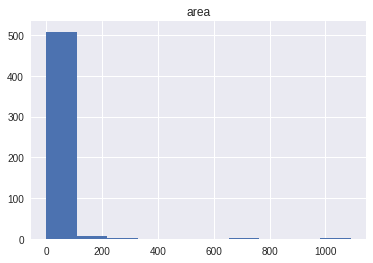

In [4]:
data.hist(column='area')

In [5]:
data['size_category'] = np.where(data['area']>6, 1, 0)
data

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,size_category
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00,0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,4,3,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,1
513,2,4,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,1
514,7,4,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,1
515,1,4,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,0


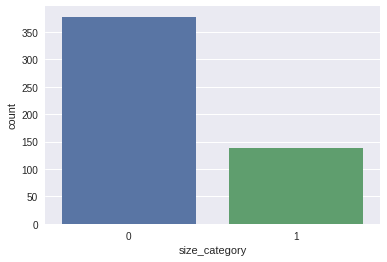

In [6]:
sns.countplot(x="size_category", data=data)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   X              517 non-null    int64  
 1   Y              517 non-null    int64  
 2   month          517 non-null    object 
 3   day            517 non-null    object 
 4   FFMC           517 non-null    float64
 5   DMC            517 non-null    float64
 6   DC             517 non-null    float64
 7   ISI            517 non-null    float64
 8   temp           517 non-null    float64
 9   RH             517 non-null    int64  
 10  wind           517 non-null    float64
 11  rain           517 non-null    float64
 12  area           517 non-null    float64
 13  size_category  517 non-null    int64  
dtypes: float64(8), int64(4), object(2)
memory usage: 56.7+ KB


In [8]:
data.describe()

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,size_category
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,4.669246,4.299807,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292,0.268859
std,2.313778,1.229900,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818,0.443796
min,1.000000,2.000000,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000,0.000000
25%,3.000000,4.000000,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000,0.000000
50%,4.000000,4.000000,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000,0.000000
75%,7.000000,5.000000,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000,1.000000
max,9.000000,9.000000,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000,1.000000


In [9]:
print('Total Data:', data.shape[0])
print('Total Features:', data.shape[1])

Total Data: 517
Total Features: 14


# Check Null Values

In [10]:
data.isnull().sum()

X                0
Y                0
month            0
day              0
FFMC             0
DMC              0
DC               0
ISI              0
temp             0
RH               0
wind             0
rain             0
area             0
size_category    0
dtype: int64

# Data Preprocessing

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Count plot of months')

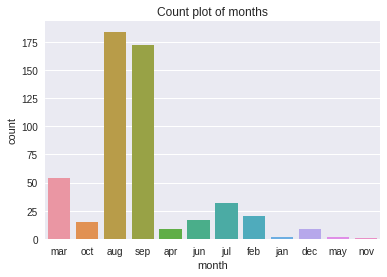

In [11]:
sns.countplot(data['month'])
plt.title('Count plot of months')

* Data terlihat sebagian besar *skewed* atau condong ke bulan **August** dan **September** (yang mana merupakan musim *summer* di Portugal)

* Oleh karena ukuran dataset yang digunakan hanya 517 baris, kecil kemungkinan akan diperoleh banyak informasi dengan mengkodekan 12 bulan dengan variabel dummy.

* Sebagai gantinya, langkah yang dilakukan selanjutnya : berupa memisahkan data `month` menjadi 4 kategori musim:  Spring, Summer, Autumn dan Winter. (Terdapat kemungkinan musim memiliki peluan bagus untuk bisa dikorelasikan dengan suhu dan hujan)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Count plot of seasons')

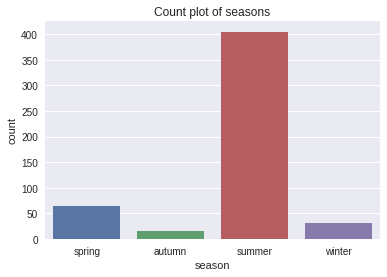

In [12]:
# dictionary of months mapping to seasons
season_dict = {'dec' : 'winter', 'jan' : 'winter', 'feb' : 'winter',
              'mar' : 'spring', 'apr' : 'spring', 'may' : 'spring',
              'jun' : 'summer', 'jul' : 'summer', 'aug' : 'summer', 'sep' : 'summer',
              'oct' : 'autumn', 'nov' : 'autumn'}

# applying dictionary
data = data.replace({'month' : season_dict})

# renaming column
data = data.rename(columns = {'month' : 'season'})

# visualizing data
sns.countplot(data['season'])
plt.title('Count plot of seasons')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Count plot of summer vs other seasons')

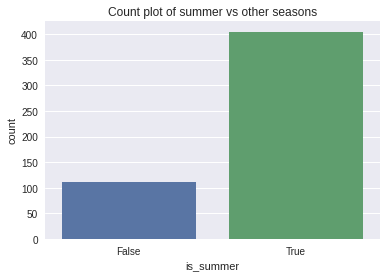

In [13]:
# converting to is summer
data['season'] = (data['season'] == 'summer')

# renaming column
data = data.rename(columns = {'season' : 'is_summer'})

# visualizing data
sns.countplot(data['is_summer'])
plt.title('Count plot of summer vs other seasons')

# Data Preprocessing Days

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Count plot of days')

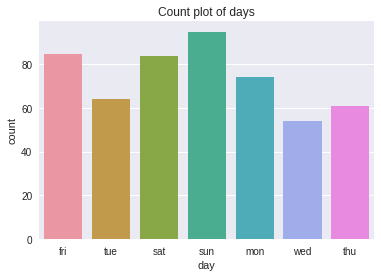

In [14]:
sns.countplot(data['day'])
plt.title('Count plot of days')

* Distribusi untuk variabel `days` terlihat cukup baik. Akan tetapi, akan dilakukan pemisahan kategori hari menjadi **weekend** dan **not weekend**. 

* Alasan di balik ini adalah bahwa jumlah area yang terbakar dalam kebakaran juga terkait dengan bagaimana petugas pemadam kebakaran merespons api. Selama akhir pekan, jumlah petugas pemadam kebakaran atau respons secara umum mungkin berbeda dibandingkan pada hari kerja.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Count plot of weekend vs weekday')

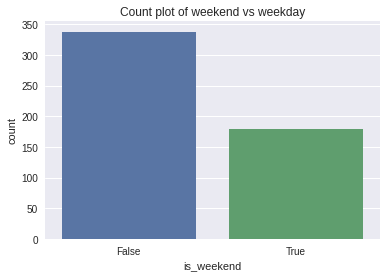

In [15]:
# converting to is weekend
data['day'] = ((data['day'] == 'sun') | (data['day'] == 'sat'))

# renaming column
data = data.rename(columns = {'day' : 'is_weekend'})

# visualizing
sns.countplot(data['is_weekend'])
plt.title('Count plot of weekend vs weekday')

# Distribusi Setiap Kolom

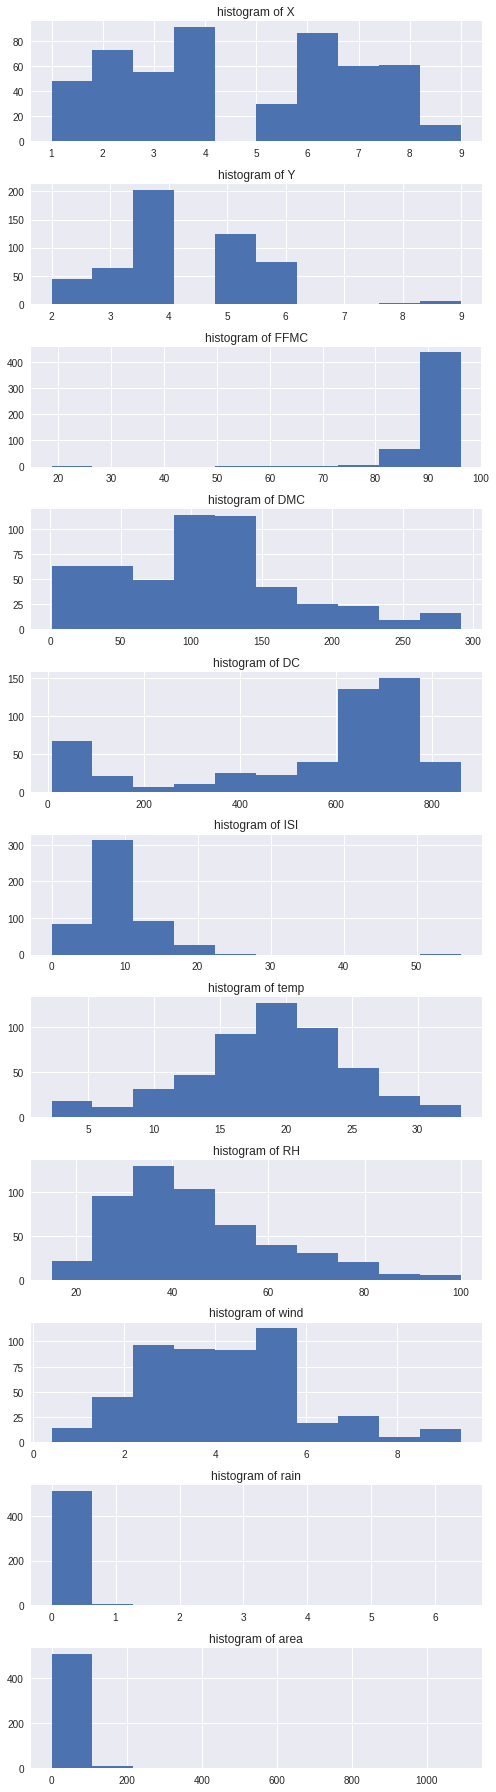

In [16]:
# subplots
fig, ax = plt.subplots(11, figsize = (7,25))

# initial index
index = 0
unused_column = ['X', 'Y', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain', 'area']

# visualizing
for column in unused_column:
    if column != 'is_summer':
        ax[index].hist(data[column])
        ax[index].title.set_text('histogram of ' + column)
        index += 1

# making plots visible
plt.tight_layout()

* Dapat dilihat bahwa sebagian besar distribusi terlihat relatif terdistribusi normal. 

* Akan tetapi, `X` dan `Y` tidak memiliki pola distribusi yang mana kita tak bisa tahu lokasi geografis dari the natural park. Ini artinya kita tidak bisa tahu pohon bagian mana yang terdapat api, jadi distribusinya tidak normal. Kita, bagaimanapun juga, tidak bisa melakukan apapun terhadap yang lain daripada membuang featurenya jadi kita akan tetap membiarkan mereka untuk sekarang dan melihat jika hal tersebut menjadi masalah di kemudian hari.

* Distribusi dari variabel `rain` and `area` terlalu *skewed* dan memiliki outliers, maka akan dilakukan scaling pada kedua variabel tersebut.

# Scaling Area

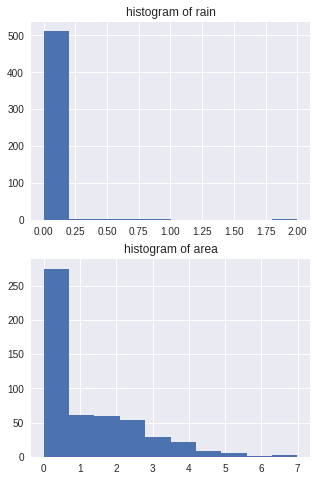

In [17]:
# natural logarithm scaling (+1 to prevent errors at 0)
data.loc[:, ['rain', 'area']] = data.loc[:, ['rain', 'area']].apply(lambda x: np.log(x + 1), axis = 1)

# visualizing
fig, ax = plt.subplots(2, figsize = (5, 8))

ax[0].hist(data['rain'])
ax[0].title.set_text('histogram of rain')

ax[1].hist(data['area'])
ax[1].title.set_text('histogram of area')

* Hasil scaling dari variabel `rain` terlihat tidak cukup baik, akan tetapi untuk variabel `area` distribusinya meningkat cukup tinggi.

* First we will split the data into train and test splits so that we can scale the train set and then scale the test set based on the train set. Then we will scale everything.

In [18]:
features = data.drop(['size_category'], axis = 1)
labels = data['size_category'].values.reshape(-1, 1)

In [19]:
X_train, X_test, y_train, y_test = train_test_split(features,
                                                    labels,
                                                    test_size = 0.2,
                                                    random_state = 42)

# Feature Scalling : StandardScaller

In [20]:
# fitting scaler
sc_features = StandardScaler()

# transforming features
X_test = sc_features.fit_transform(X_test)
X_train = sc_features.transform(X_train)

In [21]:
# features
X_test = pd.DataFrame(X_test, columns = features.columns)
X_train = pd.DataFrame(X_train, columns = features.columns)

# labels
y_test = pd.DataFrame(y_test, columns = ['size_category'])
y_train = pd.DataFrame(y_train, columns = ['size_category'])

In [22]:
X_train

,X,Y,is_summer,is_weekend,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,-0.293766,-0.927776,0.53287,1.404076,0.342959,-0.060220,0.867158,-0.249015,0.784070,-1.071784,-0.054362,-0.137348,0.219260
1,-0.293766,-0.161993,0.53287,-0.712212,-0.057456,0.370353,0.600021,-0.465731,-0.203920,-0.279375,-1.042369,-0.137348,0.177491
2,-1.130796,0.603791,0.53287,-0.712212,0.312158,0.834731,0.483714,0.664288,0.221938,0.248898,-0.054362,-0.137348,0.180797
3,-0.712281,-0.161993,0.53287,-0.712212,1.544206,1.341810,0.537142,0.664288,2.283090,-1.071784,-1.042369,-0.137348,1.087255
4,0.124750,-0.161993,-1.87663,1.404076,-1.320305,-1.602809,-2.022846,-0.945602,-1.106740,0.645102,-1.042369,-0.137348,0.578923
...,...,...,...,...,...,...,...,...,...,...,...,...,...
408,-0.293766,0.603791,0.53287,-0.712212,0.989785,-0.366247,0.623858,0.911963,-0.203920,-0.411443,-0.273919,-0.137348,-0.769306
409,-0.293766,0.603791,-1.87663,-0.712212,0.096550,-1.334146,-1.915992,-0.388332,-0.118749,-0.939716,-0.548365,-0.137348,-0.769306
410,-1.130796,-1.693559,0.53287,-0.712212,0.312158,0.834731,0.483714,0.664288,0.494487,0.843205,-0.548365,-0.137348,-0.486874
411,-1.130796,0.603791,0.53287,1.404076,-0.088257,-0.373364,-0.673602,-0.682447,0.835173,0.513034,-1.261926,-0.137348,-0.769306


In [23]:
y_train

,size_category
0,0
1,0
2,0
3,1
4,1
...,...
408,0
409,0
410,0
411,0


In [24]:
y_test

,size_category
0,0
1,0
2,0
3,0
4,0
...,...
99,0
100,0
101,0
102,1


# Modelling

# Experiment 1 : Architecture and hyperparameter

In [30]:
model = Sequential()
# input layer + 1st hidden layer
model.add(Dense(6, input_dim=13, activation='relu'))
# 2nd hidden layer
model.add(Dense(6, activation='relu'))
# output layer
model.add(Dense(6, activation='sigmoid'))

model.add(Dropout(0.2))

model.add(Dense(1, activation = 'relu'))

In [31]:
model.compile(optimizer = 'adam', metrics=['accuracy'], loss = 'binary_crossentropy')

In [32]:
history = model.fit(X_train,
                    y_train,
                    validation_data = (X_test, y_test), 
                    batch_size = 10,
                    epochs = 100)

Epoch 1/100
42/42 [==============================] - 1s 5ms/step - loss: 2.7198 - accuracy: 0.7143 - val_loss: 3.0830 - val_accuracy: 0.7308
Epoch 2/100
42/42 [==============================] - 0s 2ms/step - loss: 2.3624 - accuracy: 0.7191 - val_loss: 2.3147 - val_accuracy: 0.7308
Epoch 3/100
42/42 [==============================] - 0s 2ms/step - loss: 2.0440 - accuracy: 0.6731 - val_loss: 1.5585 - val_accuracy: 0.7308
Epoch 4/100
42/42 [==============================] - 0s 2ms/step - loss: 1.6296 - accuracy: 0.6877 - val_loss: 0.8557 - val_accuracy: 0.7308
Epoch 5/100
42/42 [==============================] - 0s 2ms/step - loss: 1.3755 - accuracy: 0.6852 - val_loss: 0.5499 - val_accuracy: 0.7500
Epoch 6/100
42/42 [==============================] - 0s 2ms/step - loss: 1.2536 - accuracy: 0.6755 - val_loss: 0.5459 - val_accuracy: 0.7500
Epoch 7/100
42/42 [==============================] - 0s 2ms/step - loss: 1.4840 - accuracy: 0.6610 - val_loss: 0.5514 - val_accuracy: 0.7404
Epoch 8/100
4

In [33]:
_, train_acc = model.evaluate(X_train, y_train, verbose=0)
_, valid_acc = model.evaluate(X_test, y_test, verbose=0)
print('Train: %.3f, Valid: %.3f' % (train_acc, valid_acc))

Train: 0.971, Valid: 0.962


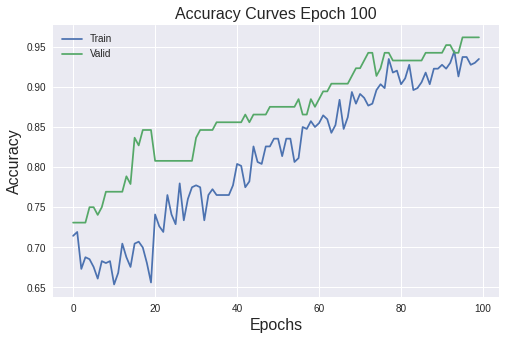

In [34]:
plt.figure(figsize=[8,5])
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Valid')
plt.legend()
plt.xlabel('Epochs', fontsize=16)
plt.ylabel('Accuracy', fontsize=16)
plt.title('Accuracy Curves Epoch 100', fontsize=16)

plt.show()

# Experiment 2 : Architecture and Hyperparameter

In [35]:
model2 = Sequential()
# input layer + 1st hidden layer
model2.add(Dense(10, input_dim=13, activation='relu'))
# 2nd hidden layer
model2.add(Dense(8, activation='relu'))
# output layer
model2.add(Dense(6, activation='sigmoid'))

model2.add(Dropout(0.2))

model2.add(Dense(1, activation = 'relu'))

In [36]:
# compile model
opt = SGD(lr=0.01, momentum=0.9)
model2.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [37]:
history2 = model2.fit(X_train,
                    y_train,
                    validation_data = (X_test, y_test), 
                    batch_size = 50,
                    epochs = 2000)

Epoch 1/2000
9/9 [==============================] - 1s 20ms/step - loss: nan - accuracy: 0.7312 - val_loss: nan - val_accuracy: 0.7308
Epoch 2/2000
9/9 [==============================] - 0s 4ms/step - loss: nan - accuracy: 0.7312 - val_loss: nan - val_accuracy: 0.7308
Epoch 3/2000
9/9 [==============================] - 0s 3ms/step - loss: nan - accuracy: 0.7312 - val_loss: nan - val_accuracy: 0.7308
Epoch 4/2000
9/9 [==============================] - 0s 5ms/step - loss: nan - accuracy: 0.7312 - val_loss: nan - val_accuracy: 0.7308
Epoch 5/2000
9/9 [==============================] - 0s 4ms/step - loss: nan - accuracy: 0.7312 - val_loss: nan - val_accuracy: 0.7308
Epoch 6/2000
9/9 [==============================] - 0s 4ms/step - loss: nan - accuracy: 0.7312 - val_loss: nan - val_accuracy: 0.7308
Epoch 7/2000
9/9 [==============================] - 0s 4ms/step - loss: nan - accuracy: 0.7312 - val_loss: nan - val_accuracy: 0.7308
Epoch 8/2000
9/9 [==============================] - 0s 4ms/st

In [40]:
_, train_acc2 = model2.evaluate(X_train, y_train, verbose=0)
_, valid_acc2 = model2.evaluate(X_test, y_test, verbose=0)
print('Train: %.3f, Valid: %.3f' % (train_acc2, valid_acc2))

Train: 0.731, Valid: 0.731


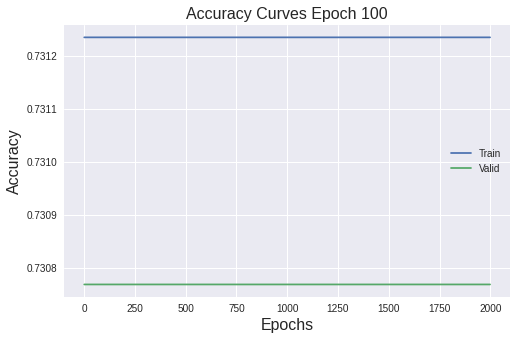

In [41]:
plt.figure(figsize=[8,5])
plt.plot(history2.history['accuracy'], label='Train')
plt.plot(history2.history['val_accuracy'], label='Valid')
plt.legend()
plt.xlabel('Epochs', fontsize=16)
plt.ylabel('Accuracy', fontsize=16)
plt.title('Accuracy Curves Epoch 100', fontsize=16)

plt.show()

# Experiment 3 : Model with multiple batch size option

arsitektur model dari eksperimen 1 dan eksperimen 2 jika dibandingkan, maka eksperimen 1 lebih baik. Oleh karena itu, arsitektur tersebutlah yang akan dipakai pada eksperimen-eksperimen berikutnya

In [48]:
# fit a model and plot learning curve
def fit_model(trainX, trainy, validX, validy, bs):
    model = Sequential()
    # input layer + 1st hidden layer
    model.add(Dense(6, input_dim=13, activation='relu'))
    # 2nd hidden layer
    model.add(Dense(6, activation='relu'))
    # output layer
    model.add(Dense(6, activation='sigmoid'))

    model.add(Dropout(0.2))

    model.add(Dense(1, activation = 'relu'))
    
    # compile model
    model.compile(optimizer = 'adam', metrics=['accuracy'], loss = 'binary_crossentropy')
    
    # fit model
    history = model.fit(trainX, trainy, validation_data=(validX, validy), epochs=200, batch_size=bs, verbose=0)
    
    # plot learning curves
    plt.plot(history.history['accuracy'], label='train')
    plt.plot(history.history['val_accuracy'], label='test')
    plt.title('batch_size='+str(bs))
    plt.legend()

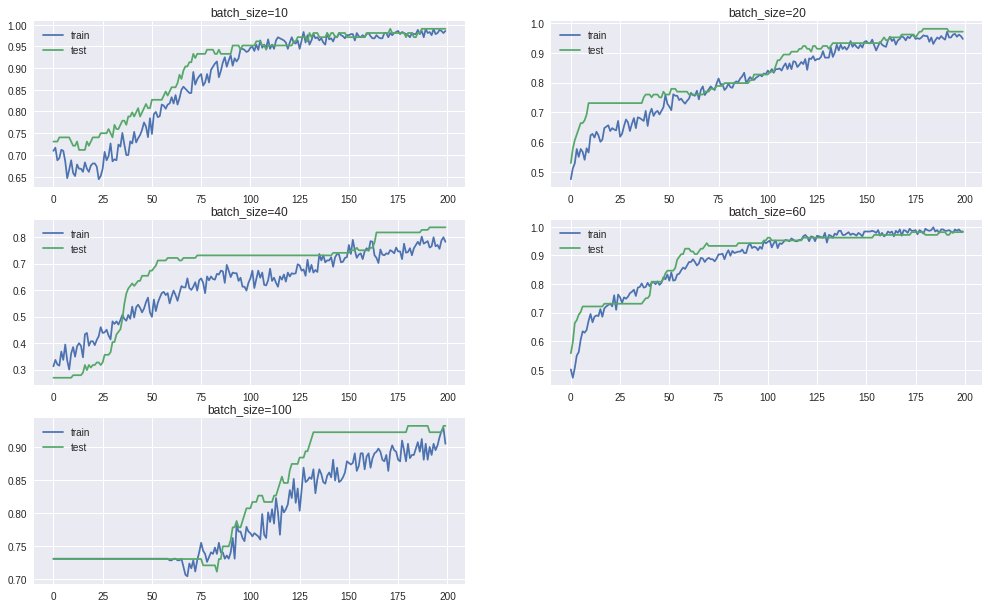

In [49]:
batch_size = [10,20,40,60,100]
plt.figure(figsize=[17,14])
for i in range(len(batch_size)):
  # determine the plot number
    plot_no = 420 + (i+1)
    plt.subplot(plot_no)
    
    # fit model and plot learning curves for a learning rate
    fit_model(X_train, y_train, X_test, y_test, batch_size[i])

plt.show()

# Experiment 4 : Trying some epochs

In [50]:
# fit a model and plot learning curve
def fit_model(trainX, trainy, validX, validy, epoch):
    model = Sequential()
    # input layer + 1st hidden layer
    model.add(Dense(6, input_dim=13, activation='relu'))
    # 2nd hidden layer
    model.add(Dense(6, activation='relu'))
    # output layer
    model.add(Dense(6, activation='sigmoid'))

    model.add(Dropout(0.2))

    model.add(Dense(1, activation = 'relu'))
    
    # compile model
    model.compile(optimizer = 'adam', metrics=['accuracy'], loss = 'binary_crossentropy')

    # fit model
    history = model.fit(trainX, trainy, validation_data=(validX, validy), epochs=epoch, batch_size=20, verbose=0)
    
    # plot learning curves
    plt.plot(history.history['accuracy'], label='train')
    plt.plot(history.history['val_accuracy'], label='test')
    plt.title('epoch='+str(epoch))
    plt.legend()

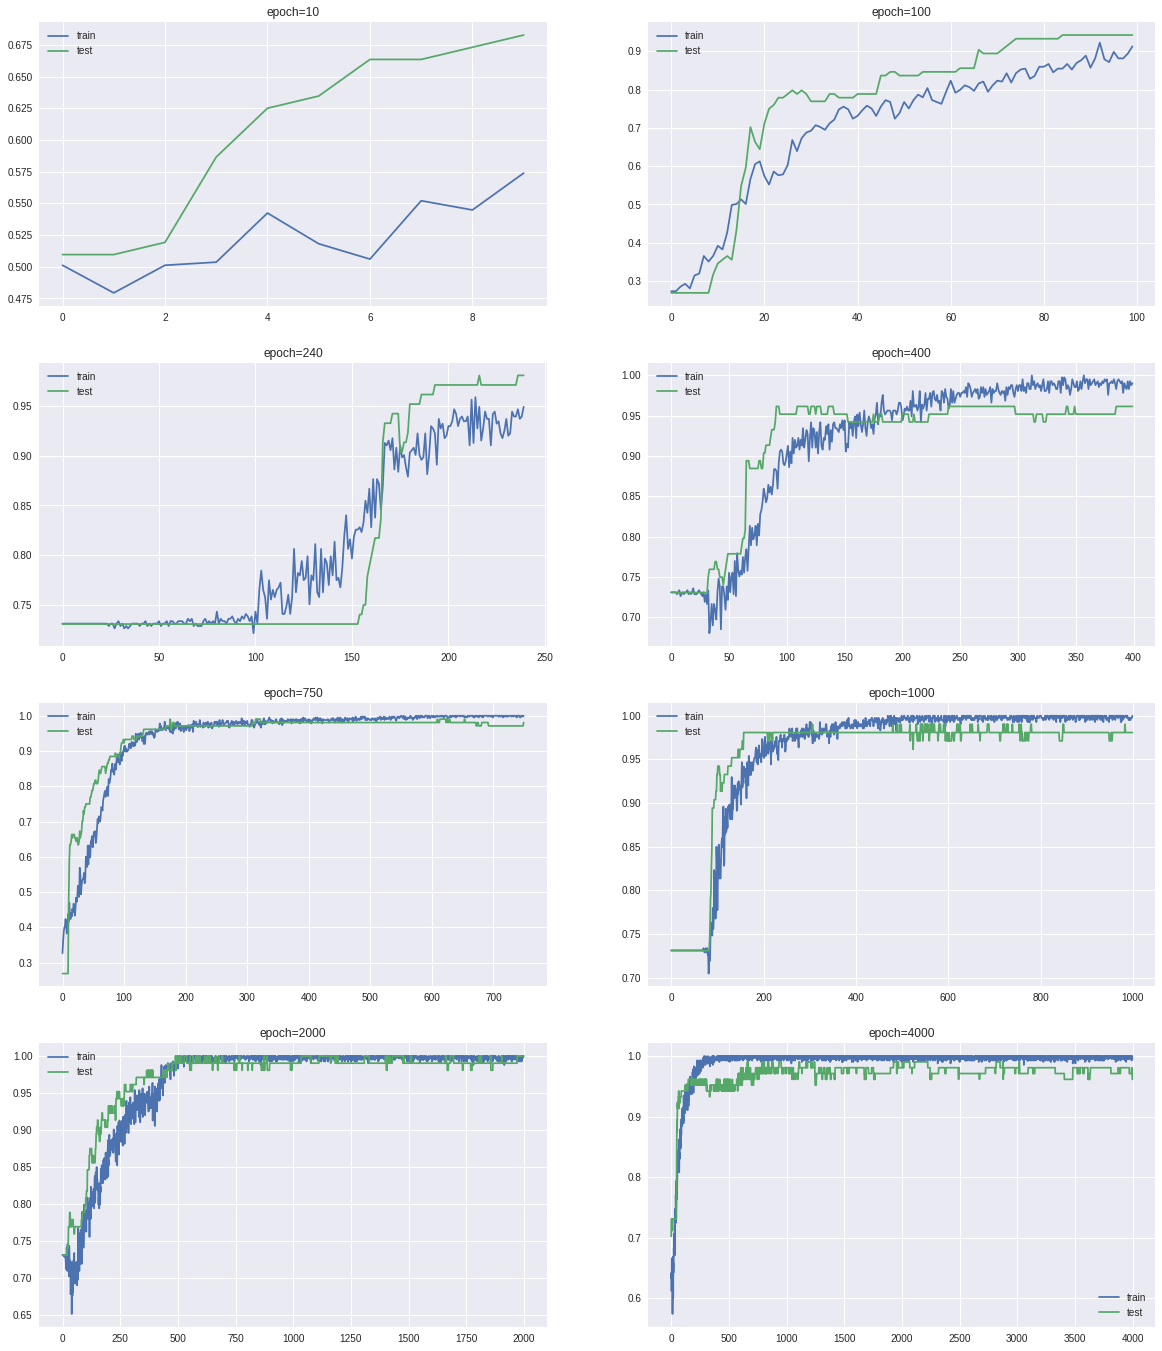

In [51]:
epoch = [10,100,240,400,750,1000,2000,4000]
plt.figure(figsize=[20,24])
for i in range(len(epoch)):
  # determine the plot number
    plot_no = 420 + (i+1)
    plt.subplot(plot_no)
    
    # fit model and plot learning curves for a learning rate
    fit_model(X_train, y_train, X_test, y_test, epoch[i])

plt.show()

# Experiment 5 : Using early stoping with patience

In [53]:
def init_model():
    # define model
    model = Sequential()
    # input layer + 1st hidden layer
    model.add(Dense(6, input_dim=13, activation='relu'))
    # 2nd hidden layer
    model.add(Dense(6, activation='relu'))
    # output layer
    model.add(Dense(6, activation='sigmoid'))

    model.add(Dropout(0.2))

    model.add(Dense(1, activation = 'relu'))
    
    # compile model
    model.compile(optimizer = 'adam', metrics=['accuracy'], loss = 'binary_crossentropy')
    
    return model

In [54]:
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint

model5 = init_model()
# simple early stopping
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=500)

In [55]:
# fit model
history5 = model5.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=4000, verbose=0, callbacks=[es])

Epoch 01105: early stopping


In [56]:
# evaluate the model
_, train_acc5 = model5.evaluate(X_train, y_train, verbose=0)
_, valid_acc5 = model5.evaluate(X_test, y_test, verbose=0)
print('Train: %.3f, Valid: %.3f' % (train_acc5, valid_acc5))

Train: 1.000, Valid: 0.971


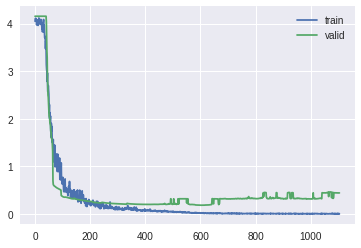

In [57]:
# plot training history
plt.plot(history5.history['loss'], label='train')
plt.plot(history5.history['val_loss'], label='valid')
plt.legend()
plt.show()

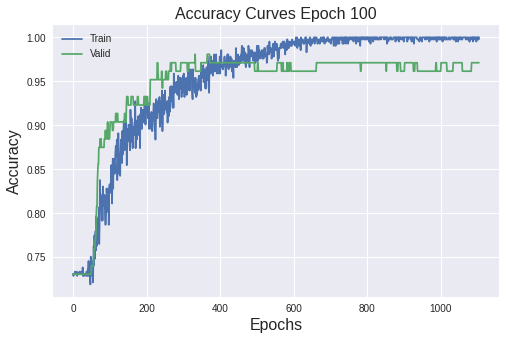

In [63]:
plt.figure(figsize=[8,5])
plt.plot(history5.history['accuracy'], label='Train')
plt.plot(history5.history['val_accuracy'], label='Valid')
plt.legend()
plt.xlabel('Epochs', fontsize=16)
plt.ylabel('Accuracy', fontsize=16)
plt.title('Accuracy Curves Epoch 100', fontsize=16)

plt.show()

# Experiment 6 : Add ModelCheckpoint to the early stoping

In [58]:
# init model
model6 = init_model()

In [59]:
# simple early stopping
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=2000)

In [60]:
mc = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)

In [61]:
# fit model
history6 = model6.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=4000, verbose=0, callbacks=[es, mc])


Epoch 00001: val_accuracy improved from -inf to 0.26923, saving model to best_model.h5

Epoch 00002: val_accuracy improved from 0.26923 to 0.27885, saving model to best_model.h5

Epoch 00003: val_accuracy did not improve from 0.27885

Epoch 00004: val_accuracy improved from 0.27885 to 0.36538, saving model to best_model.h5

Epoch 00005: val_accuracy improved from 0.36538 to 0.46154, saving model to best_model.h5

Epoch 00006: val_accuracy improved from 0.46154 to 0.52885, saving model to best_model.h5

Epoch 00007: val_accuracy improved from 0.52885 to 0.59615, saving model to best_model.h5

Epoch 00008: val_accuracy improved from 0.59615 to 0.63462, saving model to best_model.h5

Epoch 00009: val_accuracy improved from 0.63462 to 0.67308, saving model to best_model.h5

Epoch 00010: val_accuracy did not improve from 0.67308

Epoch 00011: val_accuracy improved from 0.67308 to 0.68269, saving model to best_model.h5

Epoch 00012: val_accuracy improved from 0.68269 to 0.69231, saving mode

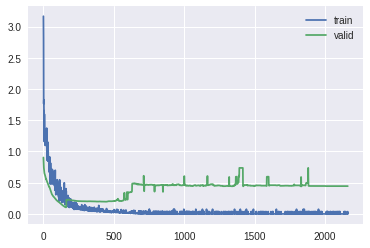

In [62]:
# plot training history
plt.plot(history6.history['loss'], label='train')
plt.plot(history6.history['val_loss'], label='valid')
plt.legend()
plt.show()

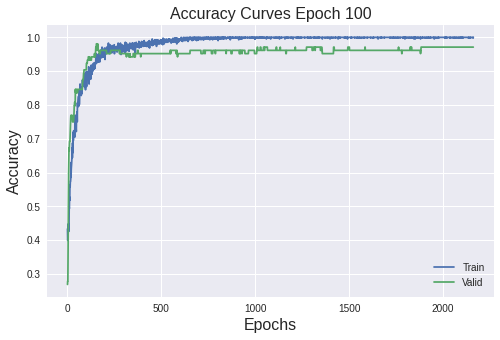

In [64]:
plt.figure(figsize=[8,5])
plt.plot(history6.history['accuracy'], label='Train')
plt.plot(history6.history['val_accuracy'], label='Valid')
plt.legend()
plt.xlabel('Epochs', fontsize=16)
plt.ylabel('Accuracy', fontsize=16)
plt.title('Accuracy Curves Epoch 100', fontsize=16)

plt.show()